In [83]:
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

Automatically created module for IPython interactive environment


In [84]:
# #############################################################################
# 获得样本数据
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

In [85]:
print(type(X))
print(X.ndim)
print(X.shape)
print(type(y))
print(y.ndim)
print(y.shape)

X[:5,]

<class 'numpy.ndarray'>
2
(40, 1)
<class 'numpy.ndarray'>
1
(40,)


array([[0.1026293 ],
       [0.26729016],
       [0.44001995],
       [0.4567688 ],
       [0.6009823 ]])

In [86]:
# #############################################################################
# 在标签中增加噪音
y[::5] += 3 * (0.5 - np.random.rand(8))

In [87]:
print(type(y))
print(y.ndim)
print(y.shape)

y

<class 'numpy.ndarray'>
1
(40,)


array([ 0.74605168,  0.2641188 ,  0.42595751,  0.44105047,  0.56545293,
        1.09083279,  0.85118267,  0.9178037 ,  0.96359195,  0.97452437,
        0.0681812 ,  0.99999238,  0.99998635,  0.98203982,  0.95717289,
        0.45636489,  0.9107612 ,  0.8946089 ,  0.87506983,  0.82423106,
       -0.13642658,  0.57175745,  0.528992  ,  0.30593044,  0.18686129,
        0.91356079, -0.24243503, -0.28106486, -0.3093784 , -0.4757671 ,
       -0.73997013, -0.64120558, -0.67952146, -0.71672825, -0.84571916,
        0.21005164, -0.96139994, -0.98136012, -0.98292872, -0.95986881])

In [88]:
# #############################################################################
# 拟合回归模型
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

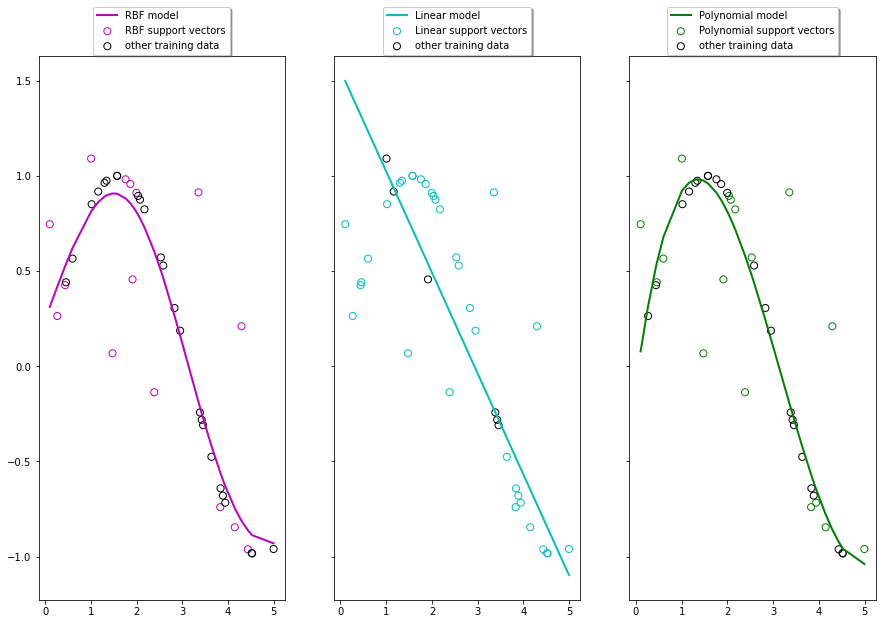

In [89]:
# #############################################################################
# 查看结果
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

In [90]:
fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()